In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Employee = pd.read_excel("Employee dataset.xlsx",sheet_name ='Sheet6')

In [3]:
Employee.head()

,EmpID,DOB,Date of Joining,Sex,MarriedID,Department,Position,Job_type,Age,Total Experience,...,R,Tableau,Power BI,Java,C++,VBA,Salary,Skill_score,Worthiness,Salary in LPA
0,10212,1952-01-18,2012-11-10,F,Yes,Data Science,Senior Data Scientist,Full-Time,69,48,...,0,3,0,0,4,1,85028,22,56.4,16.0
1,10140,1954-10-12,2010-05-12,M,Yes,Data Science,Analytics Senior Manager,Full-Time,66,45,...,2,2,4,5,1,0,61809,23,63.9,23.0
2,10040,1963-05-15,2011-08-18,F,Yes,Data Science,Data Science Manager,Full-Time,57,36,...,3,2,2,1,5,4,71860,22,68.0,22.0
3,10258,1963-08-28,2011-09-06,M,Yes,Data Science,Data Science Manager,Full-Time,57,36,...,4,5,1,1,0,3,67251,21,59.3,22.0
4,10222,1964-01-04,2012-01-09,M,Yes,Data Science,Data Science Manager,Full-Time,57,36,...,0,4,1,5,4,1,148999,22,51.9,22.0


In [4]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmpID                76 non-null     int64         
 1   DOB                  76 non-null     datetime64[ns]
 2   Date of Joining      76 non-null     datetime64[ns]
 3   Sex                  76 non-null     object        
 4   MarriedID            76 non-null     object        
 5   Department           76 non-null     object        
 6   Position             76 non-null     object        
 7   Job_type             76 non-null     object        
 8   Age                  76 non-null     int64         
 9   Total Experience     76 non-null     int64         
 10  Experience Bin       76 non-null     int64         
 11  Experience_score     76 non-null     float64       
 12  Exp in cur comapany  76 non-null     int64         
 13  Exp in pr companies  76 non-null     

In [16]:
Data = Employee[["EmpID", "DOB", "Date of Joining", "Sex", "MarriedID", "Department", "Position", "Total Experience", "Educationa Degree", "Graduation Grade", "PerformanceScore", "EngagementSurvey", "Adv. Excel", "Python", "SQL", "R", "Tableau", "Power BI", "Java", "C++", "VBA", "Worthiness", "Salary in LPA"]]

print(Data.head())

Data2 = Employee[["Education_Score", "Experience_score", "Skill_score", "Worthiness", "Salary in LPA", "Position", "Sex"]]

Data2.head()

   EmpID        DOB Date of Joining Sex MarriedID    Department  \
0  10212 1952-01-18      2012-11-10   F       Yes  Data Science   
1  10140 1954-10-12      2010-05-12  M        Yes  Data Science   
2  10040 1963-05-15      2011-08-18   F       Yes  Data Science   
3  10258 1963-08-28      2011-09-06  M        Yes  Data Science   
4  10222 1964-01-04      2012-01-09  M        Yes  Data Science   

                   Position  Total Experience Educationa Degree  \
0     Senior Data Scientist                48               B.E   
1  Analytics Senior Manager                45               B.E   
2      Data Science Manager                36               B.E   
3      Data Science Manager                36               B.E   
4      Data Science Manager                36              B.Sc   

  Graduation Grade  ... Python  SQL  R  Tableau  Power BI  Java  C++  VBA  \
0                B  ...      4    5  0        3         0     0    4    1   
1                A  ...      4    0  2  

,Education_Score,Experience_score,Skill_score,Worthiness,Salary in LPA,Position,Sex
0,13.5,15.5,22,56.4,16.0,Senior Data Scientist,F
1,15.0,19.9,23,63.9,23.0,Analytics Senior Manager,M
2,15.0,25.0,22,68.0,22.0,Data Science Manager,F
3,12.0,21.5,21,59.3,22.0,Data Science Manager,M
4,6.0,21.5,22,51.9,22.0,Data Science Manager,M


EDA

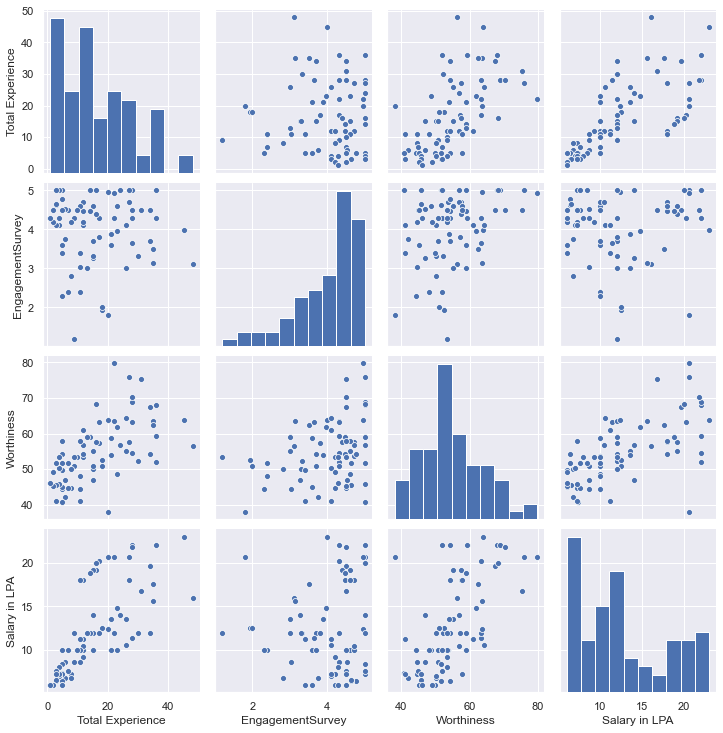

In [6]:
sns.set()
cols = ['Total Experience', 'EngagementSurvey', 'Worthiness', 'Salary in LPA']
sns.pairplot(Data[cols])
plt.show()

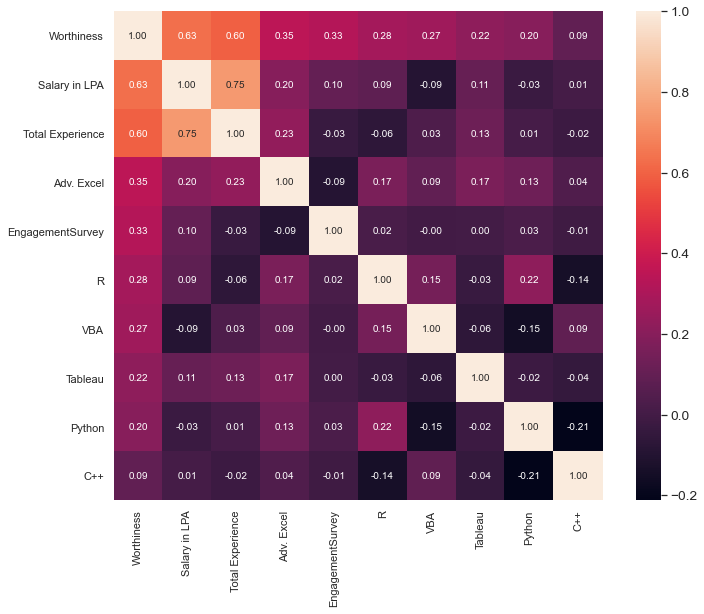

In [7]:
corrmat = Data.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
col = corrmat.nlargest(k, 'Worthiness')['Worthiness'].index
cm = np.corrcoef(Data[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col.values, xticklabels=col.values)
plt.show()

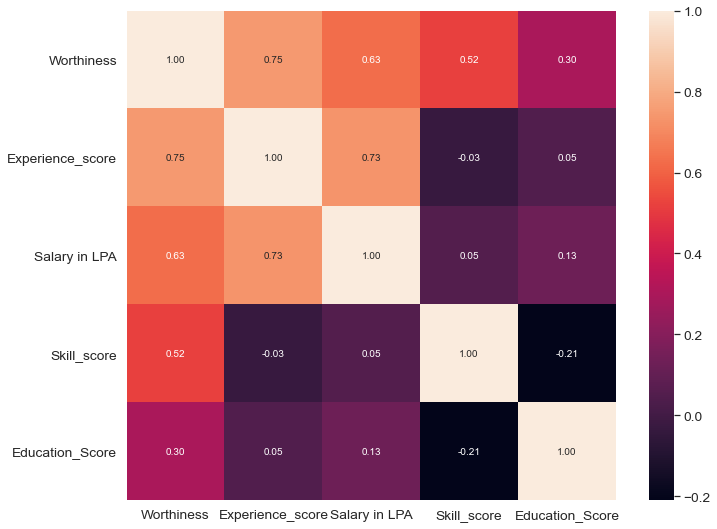

In [8]:
corrmat = Data2.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
col = corrmat.nlargest(k, 'Worthiness')['Worthiness'].index
cm = np.corrcoef(Data2[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col.values, xticklabels=col.values)
plt.show()

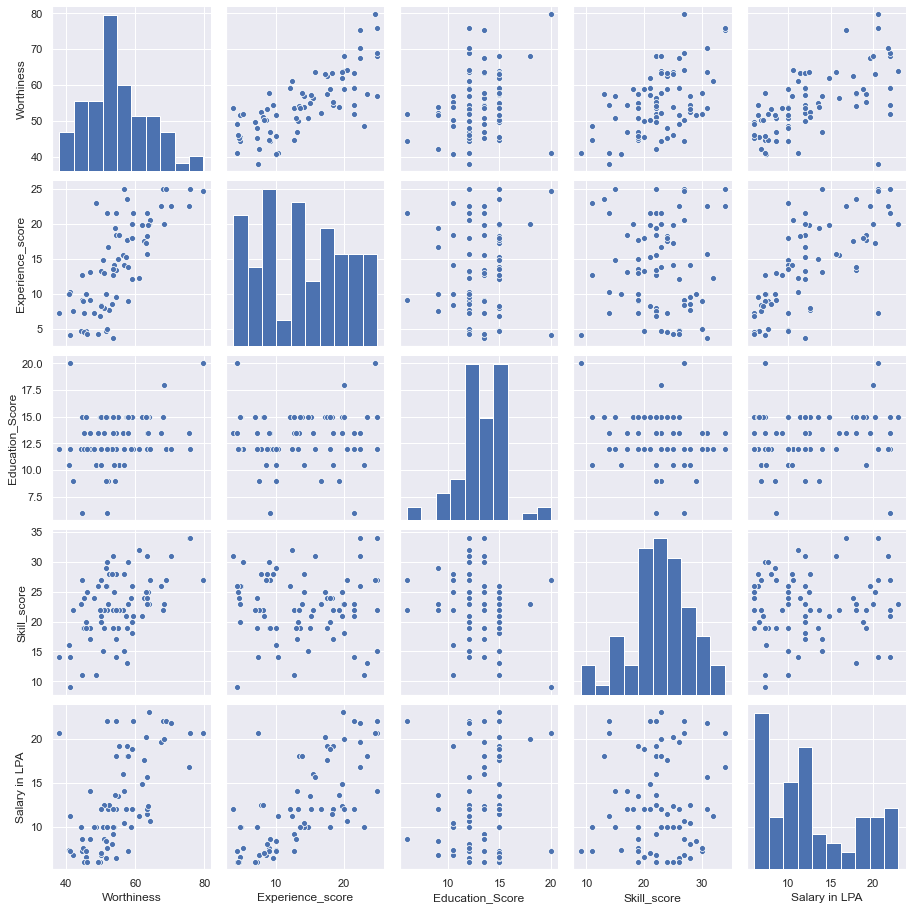

In [9]:
sns.set()
cols = ['Worthiness', 'Experience_score', 'Education_Score', 'Skill_score','Salary in LPA']
sns.pairplot(Data2[cols])
plt.show()

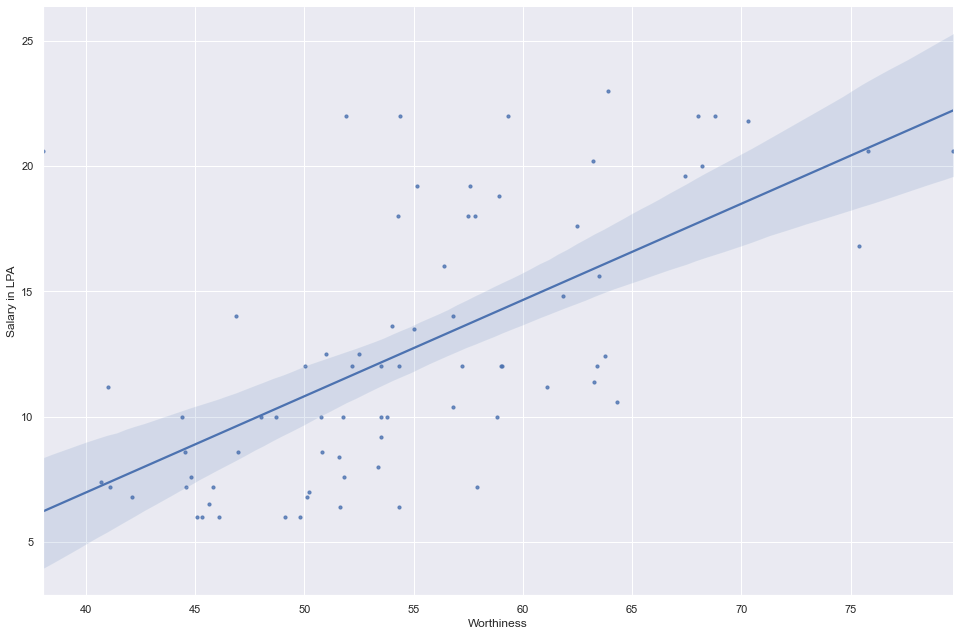

In [10]:
sns.lmplot(x='Worthiness',y='Salary in LPA',data=Data, 
            scatter_kws={'s':10}, height = 9, aspect = 1.5, legend_out = False)
plt.show()

In [11]:
np.corrcoef(Data["Worthiness"], Data['Salary in LPA'])

array([[1.        , 0.63069464],
       [0.63069464, 1.        ]])

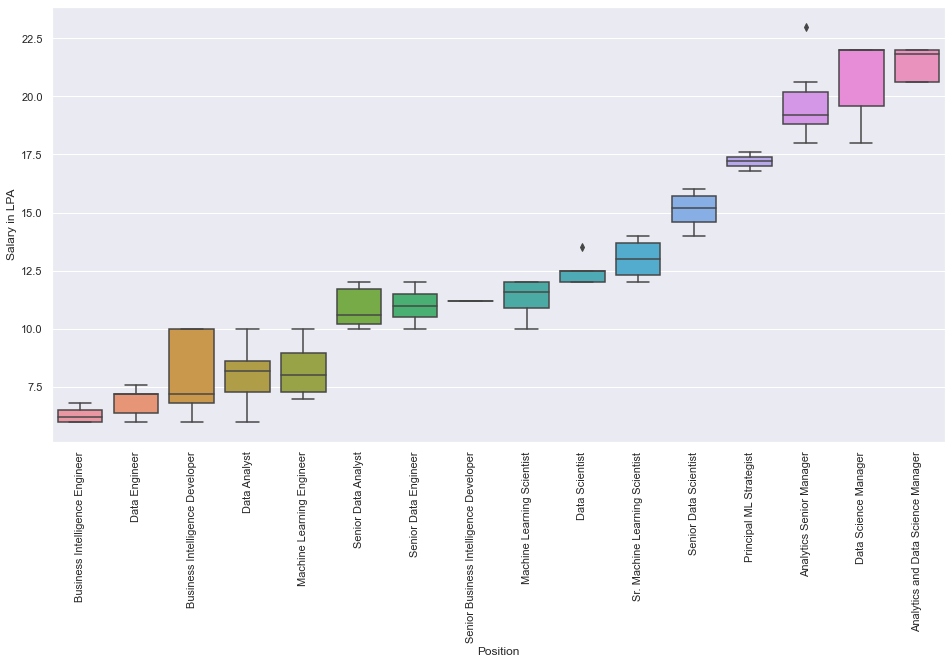

In [12]:
temp = Data.groupby('Position')['Salary in LPA'].mean().sort_values(ascending = True)

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Position', y="Salary in LPA", data=Data, order = temp.index)
plt.xticks(rotation=90);

In [13]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [14]:
df_train = Data2[["Sex", "Position"]]
df_train.head()

,Sex,Position
0,F,Senior Data Scientist
1,M,Analytics Senior Manager
2,F,Data Science Manager
3,M,Data Science Manager
4,M,Data Science Manager


Lets label the categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function

d = defaultdict(LabelEncoder)
print(d)

defaultdict(<class 'sklearn.preprocessing._label.LabelEncoder'>, {})


In [18]:
# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))

df_train.head()

,Sex,Position
0,0,14
1,1,0
2,0,6
3,1,6
4,1,6


In [19]:
df_train[["Education_Score", "Experience_score", "Skill_score","Salary in LPA","Worthiness"]] = Data2[["Education_Score", "Experience_score", "Skill_score", "Salary in LPA","Worthiness"]]
df_train.head()

,Sex,Position,Education_Score,Experience_score,Skill_score,Salary in LPA,Worthiness
0,0,14,13.5,15.5,22,16.0,56.4
1,1,0,15.0,19.9,23,23.0,63.9
2,0,6,15.0,25.0,22,22.0,68.0
3,1,6,12.0,21.5,21,22.0,59.3
4,1,6,6.0,21.5,22,22.0,51.9


Also, let’s standardize the data using StandardScaler of scikit-learn even though it is on almost the same scale:

In [20]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
# Standardizing the data apart from the Class column

df_train_scaled = pd.DataFrame(sst.fit_transform(df_train.drop('Worthiness',axis=1)))

# Adding the Class column back to the DataFrame
df_train_scaled['Worthiness'] = df_train.Worthiness

df_train_scaled.head()

,0,1,2,3,4,5,Worthiness
0,-1.141504,1.645960,0.182990,0.232221,-0.110954,0.634625,56.4
1,0.876038,-1.363149,0.805701,0.919978,0.076435,1.976517,63.9
2,-1.141504,-0.073531,0.805701,1.717152,-0.110954,1.784818,68.0
3,0.876038,-0.073531,-0.439722,1.170072,-0.298342,1.784818,59.3
4,0.876038,-0.073531,-2.930568,1.170072,-0.110954,1.784818,51.9


In [21]:
def Definedata():
    # define dataset
    data2 = df_train
    X = data2.drop(columns=['Worthiness']).values
    y0 = data2['Worthiness'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y


In [22]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [23]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor(max_iter=7000)],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

In [24]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
0,DecisionTreeRegressor,12.227908,1.000000,0.662958
3,MLPRegressor,10.357077,0.997604,0.758201
4,AdaBoostRegressor,8.812066,0.957960,0.824961
2,RandomForestRegressor,7.729548,0.965341,0.865325
5,ExtraTreesRegressor,7.029706,1.000000,0.888608
1,XGBRegressor,6.456009,1.000000,0.906048


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            
        }
       ]

clf = GridSearchCV(MLPRegressor(), param_grid, cv=,
                           scoring= )
clf.fit(X,y)


print("Best parameters set found on development set:")
print(clf.best_params_)